In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/t-bank/invest_db.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv("/kaggle/input/t-bank/invest_db.csv",sep=';', engine='python')
train.head()

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
0,1479787897,2024-04-20,33,NaN,UNM,"0,0","31272,0",2023-09-13,1,0,...,"428,0","0,0","0,0","-11298,0","541,0","0,0","0,0","0,0","0,0","0,0"
1,601760063,2024-02-01,29,GRD,UNM,"0,0","6284,0",2021-03-29,0,0,...,"23,0","0,0","0,0",NaN,"8115,0","0,0","0,0","0,0","0,0","0,0"
2,61175329,2024-02-10,38,SCH,MAR,"0,0","1904,0",2023-12-05,1,0,...,"193,0","0,0","0,0","0,0","25,0",NaN,"0,0","0,0","0,0","2,0"
3,1411700618,2024-03-05,64,NaN,NaN,"0,0",NaN,2021-09-16,0,0,...,"0,0","0,0","0,0",NaN,"65,0",NaN,"0,0","0,0","0,0","0,0"
4,2096755145,2024-02-10,31,NaN,UNM,"0,0",NaN,2022-03-01,0,0,...,"0,0","0,0","0,0","0,0","0,0",NaN,"0,0","0,0","0,0","0,0"


In [4]:
##statistical info
train.describe()

,id,age,forts_flg,margin_status_flg,qualified_investor_flg
count,4.583700e+05,458370.000000,458370.000000,458370.000000,458370.000000
mean,1.062470e+09,40.533674,0.530006,0.322597,0.286797
std,6.192610e+08,10.917544,0.499099,0.467471,0.452266
min,4.239000e+04,18.000000,0.000000,0.000000,0.000000
25%,5.234677e+08,33.000000,0.000000,0.000000,0.000000
50%,1.053416e+09,40.000000,1.000000,0.000000,0.000000
75%,1.613187e+09,47.000000,1.000000,1.000000,1.000000
max,2.147203e+09,86.000000,1.000000,1.000000,1.000000


In [5]:
##datatype info 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458370 entries, 0 to 458369
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        458370 non-null  int64 
 1   date                      458370 non-null  object
 2   age                       458370 non-null  int64 
 3   education_level_cd        233460 non-null  object
 4   marital_status_cd         267030 non-null  object
 5   children_cnt              410310 non-null  object
 6   monthly_income_amt        355140 non-null  object
 7   invest_utilization_dt     458370 non-null  object
 8   forts_flg                 458370 non-null  int64 
 9   margin_status_flg         458370 non-null  int64 
 10  qualified_investor_flg    458370 non-null  int64 
 11  in_payment_rub_amt        458370 non-null  object
 12  out_payment_rub_amt       458370 non-null  object
 13  uncovered_position_amt    458370 non-null  object
 14  turn

In [6]:
train.isnull().sum()

id                               0
date                             0
age                              0
education_level_cd          224910
marital_status_cd           191340
children_cnt                 48060
monthly_income_amt          103230
invest_utilization_dt            0
forts_flg                        0
margin_status_flg                0
qualified_investor_flg           0
in_payment_rub_amt               0
out_payment_rub_amt              0
uncovered_position_amt           0
turnover_rus_bon_amt             0
turnover_rus_sec_amt             0
turnover_forts_amt               0
turnover_cur_amt                 0
turnover_etf_amt                 0
turnover_fnd_amt                 0
turnover_opt_amt                 0
turnover_ore_prc_amt             0
turnover_ore_sel_amt             0
turnover_tracking_amt            0
trade_order_rus_sec_cnt          0
trade_order_rus_bon_cnt          0
trade_order_forts_cnt            0
trade_order_cur_cnt              0
trade_order_etf_cnt 

<Axes: xlabel='education_level_cd', ylabel='count'>

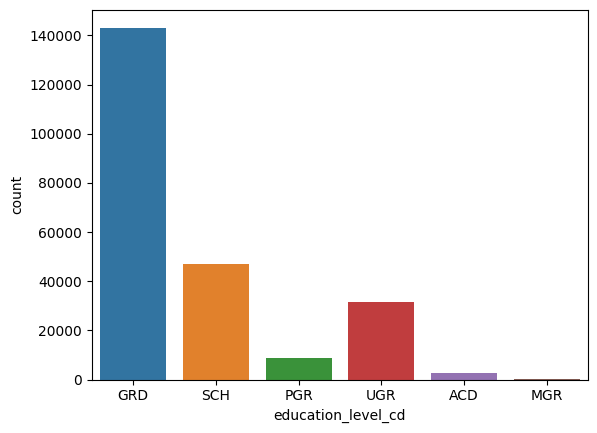

In [7]:
sns.countplot(train, x="education_level_cd")

<Axes: xlabel='marital_status_cd', ylabel='count'>

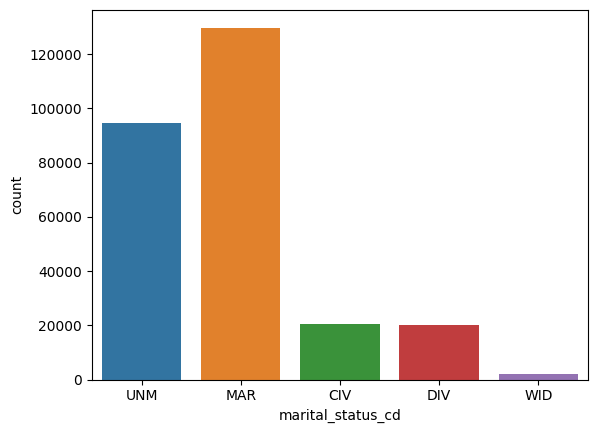

In [8]:
sns.countplot(train, x="marital_status_cd")

<Axes: xlabel='age', ylabel='Density'>

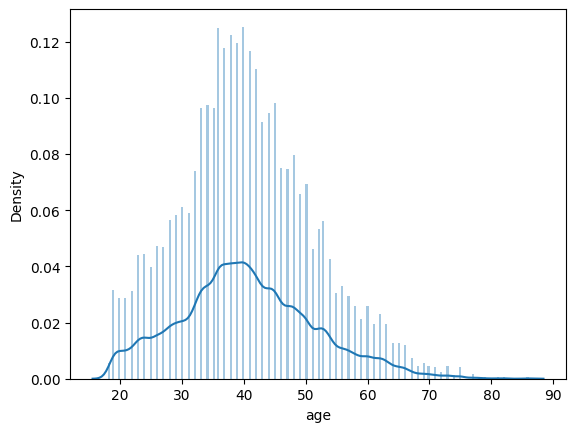

In [9]:
sns.distplot(train['age'],bins = 200)

In [10]:
train['ccr_balance_amt'] = train['ccr_balance_amt'].fillna(0)
train['lon_balance_amt'] = train['lon_balance_amt'].fillna(0)
train['cor_balance_amt'] = train['cor_balance_amt'].fillna(0)

In [11]:
social_cols = ['posts', 'comments', 'reacts', 'reads']
train[social_cols] = train[social_cols].fillna(0)

In [12]:
train['marital_status_cd'] = train['marital_status_cd'].fillna(-1)

In [13]:
train['children_cnt'] = train['children_cnt'].fillna(-1)

In [14]:
train["education_level_cd"] = train["education_level_cd"].fillna(-1)

In [15]:
print(train['monthly_income_amt'].dtype)
print(train['monthly_income_amt'].head(10))

object
0    31272,0
1     6284,0
2     1904,0
3        NaN
4        NaN
5     3158,0
6     2690,0
7     5020,0
8     1595,0
9    16898,0
Name: monthly_income_amt, dtype: object


In [16]:
print(train['monthly_income_amt'] )

0         31272,0
1          6284,0
2          1904,0
3             NaN
4             NaN
           ...   
458365        NaN
458366     2524,0
458367     6267,0
458368     4713,0
458369     1436,0
Name: monthly_income_amt, Length: 458370, dtype: object


In [17]:
numeric_cols = [
    'monthly_income_amt', 'in_payment_rub_amt', 'out_payment_rub_amt',
    'uncovered_position_amt', 'turnover_rus_bon_amt', 'turnover_rus_sec_amt',
    'turnover_forts_amt', 'turnover_cur_amt', 'turnover_etf_amt',
    'turnover_fnd_amt', 'turnover_opt_amt', 'turnover_ore_prc_amt',
    'turnover_ore_sel_amt', 'turnover_tracking_amt', 'trade_order_rus_sec_cnt',
    'trade_order_rus_bon_cnt', 'trade_order_forts_cnt', 'trade_order_cur_cnt',
    'trade_order_etf_cnt', 'trade_order_fnd_cnt', 'trade_order_opt_cnt',
    'trade_order_ore_prc_cnt', 'trade_order_ore_sel_cnt', 'trade_order_tracking_cnt',
    'portf_total_amt', 'portf_mex_amt', 'portf_rus_sec_amt', 'portf_rus_bon_amt',
    'initial_margin_amt', 'portf_cur_amt', 'portf_etf_amt', 'portf_fnd_amt',
    'portf_opt_amt', 'portf_ore_amt', 'ccr_balance_amt', 'cor_balance_amt',
    'lon_balance_amt', 'posts', 'comments', 'reacts', 'reads'
]


def clean_numeric_column(series):
    return (series
            .astype(str)
            .str.replace(' ', '', regex=False)
            .str.replace(',', '.', regex=False)
            .str.replace('руб', '', regex=False)
            .str.replace('$', '', regex=False)
            .replace('nan', None)
            .replace('NaN', None)
            .replace('', None)
            .astype('float'))


for col in numeric_cols:
    if col in train.columns:
        train[col] = clean_numeric_column(train[col])

In [18]:

train['invest_utilization_dt'] = pd.to_datetime(train['invest_utilization_dt'], errors='coerce')




train['invest_days'] = (pd.to_datetime('today') - train['invest_utilization_dt']).dt.days
print(train['invest_days'])

0          713
1         1611
2          630
3         1440
4         1274
          ... 
458365    1586
458366    1720
458367    1629
458368    1922
458369    1399
Name: invest_days, Length: 458370, dtype: int64


In [19]:
client_analysis = train.groupby('id').agg({
    # Количество сделок по типам активов
    'trade_order_rus_sec_cnt': 'sum',
    'trade_order_rus_bon_cnt': 'sum', 
    'trade_order_forts_cnt': 'sum',
    'trade_order_cur_cnt': 'sum',
    'trade_order_etf_cnt': 'sum',
    'trade_order_fnd_cnt': 'sum',
    'trade_order_opt_cnt': 'sum',
    'trade_order_ore_prc_cnt': 'sum',
    'trade_order_ore_sel_cnt': 'sum',
    'trade_order_tracking_cnt': 'sum',
    
    # Объемы торговли по типам активов
    'turnover_rus_sec_amt': 'sum',
    'turnover_rus_bon_amt': 'sum',
    'turnover_forts_amt': 'sum', 
    'turnover_cur_amt': 'sum',
    'turnover_etf_amt': 'sum',
    'turnover_fnd_amt': 'sum',
    'turnover_opt_amt': 'sum',
    'turnover_ore_prc_amt': 'sum',
    'turnover_ore_sel_amt': 'sum',
    'turnover_tracking_amt': 'sum',
    
    # Общие показатели
    'forts_flg': 'max',
    'margin_status_flg': 'max',
    'qualified_investor_flg': 'max'
}).reset_index()

client_analysis = client_analysis.fillna(0)
print(client_analysis["id"])


0            42390
1           129326
2           185930
3           404940
4          1035537
           ...    
5088    2144825007
5089    2144849682
5090    2145393660
5091    2146122460
5092    2147202935
Name: id, Length: 5093, dtype: int64


In [20]:
client_analysis['total_trades'] = (
    client_analysis['trade_order_rus_sec_cnt'] + 
    client_analysis['trade_order_rus_bon_cnt'] + 
    client_analysis['trade_order_forts_cnt'] + 
    client_analysis['trade_order_cur_cnt'] + 
    client_analysis['trade_order_etf_cnt'] + 
    client_analysis['trade_order_fnd_cnt'] + 
    client_analysis['trade_order_opt_cnt'] + 
    client_analysis['trade_order_ore_prc_cnt'] + 
    client_analysis['trade_order_ore_sel_cnt'] + 
    client_analysis['trade_order_tracking_cnt']
)



In [21]:
active_clients = client_analysis[client_analysis['total_trades'] > 10]
print(f"Активных клиентов (>10 сделок): {len(active_clients)}")


Активных клиентов (>10 сделок): 5092


In [22]:
asset_names = {
    'trade_order_rus_sec_cnt': 'Российские акции',
    'trade_order_rus_bon_cnt': 'Российские облигации', 
    'trade_order_forts_cnt': 'Фьючерсы',
    'trade_order_cur_cnt': 'Валютные операции',
    'trade_order_etf_cnt': 'ETF',
    'trade_order_fnd_cnt': 'фонды Тинькофф Капитала',
    'trade_order_opt_cnt': 'Опционы',
    'trade_order_ore_prc_cnt': 'покупка драгоценных металлов',
    'trade_order_ore_sel_cnt': 'продажа драгоценных металлов',
    'trade_order_tracking_cnt': 'Автоследования'
}

# Анализ по количеству сделок
trade_preferences = []
for col in asset_names.keys():
    if col in active_clients.columns:
        total_trades = active_clients[col].sum()
        trade_preferences.append((asset_names[col], total_trades))

trade_preferences.sort(key=lambda x: x[1], reverse=True)

print("\nТоп-5 предпочтений по количеству сделок:")
for i, (asset, trades) in enumerate(trade_preferences[:5], 1):
    print(f"{i}. {asset}: {trades:,} сделок")



Топ-5 предпочтений по количеству сделок:
1. Российские акции: 767,532.0 сделок
2. Автоследования: 509,735.0 сделок
3. ETF: 213,233.0 сделок
4. фонды Тинькофф Капитала: 170,670.0 сделок
5. Российские облигации: 146,668.0 сделок


Text(0.5, 0, 'Количество сделок')

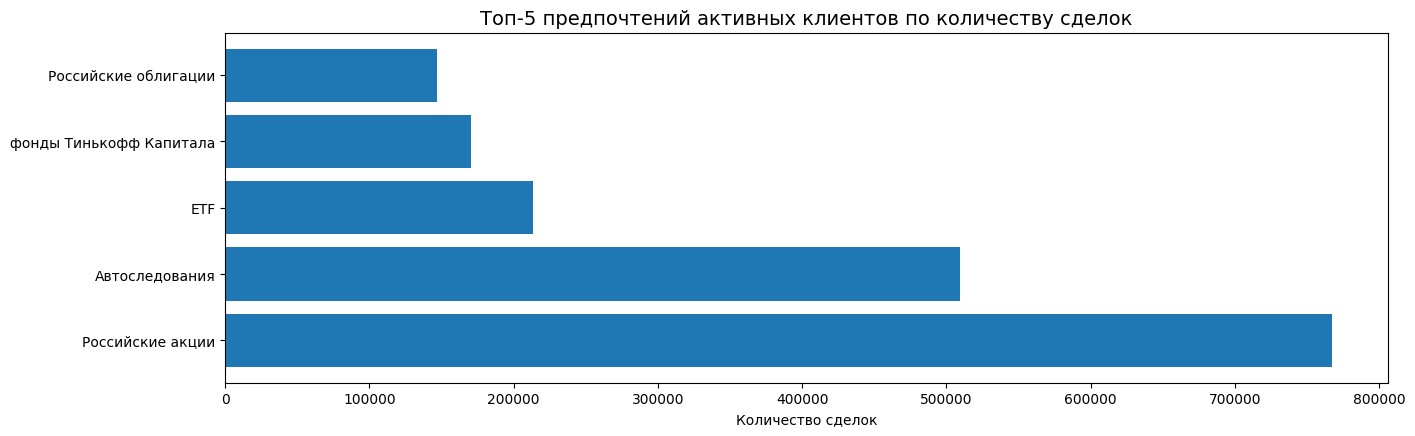

In [23]:
plt.figure(figsize=(15, 10))


plt.subplot(2, 1, 1)
top_5_trades = trade_preferences[:5]
plt.barh([x[0] for x in top_5_trades], [x[1] for x in top_5_trades])
plt.title('Топ-5 предпочтений активных клиентов по количеству сделок', fontsize=14)
plt.xlabel('Количество сделок')


In [24]:
print(f"Среднее количество сделок на клиента: {client_analysis['total_trades'].mean():.1f}")
print(f"Медианное количество сделок на клиента: {client_analysis['total_trades'].median():.1f}")
print(f"Максимальное количество сделок: {client_analysis['total_trades'].max():,}")



Среднее количество сделок на клиента: 382.5
Медианное количество сделок на клиента: 270.0
Максимальное количество сделок: 2,569.0


In [25]:
# Распределение клиентов по количеству сделок
print("\nРаспределение клиентов по количеству сделок:")
bins = [0, 1, 5, 10, 25, 50, 100, 500, 1000, float('inf')]
labels = ['1', '2-5', '6-10', '11-25', '26-50', '51-100', '101-500', '501-1000', '1000+']

client_analysis['trade_category'] = pd.cut(client_analysis['total_trades'], bins=bins, labels=labels, include_lowest=True)
trade_distribution = client_analysis['trade_category'].value_counts().sort_index()

for category, count in trade_distribution.items():
    percentage = (count / len(client_analysis)) * 100
    print(f"{category}: {count:,} клиентов ({percentage:.1f}%)")



Распределение клиентов по количеству сделок:
1: 0 клиентов (0.0%)
2-5: 0 клиентов (0.0%)
6-10: 1 клиентов (0.0%)
11-25: 45 клиентов (0.9%)
26-50: 307 клиентов (6.0%)
51-100: 769 клиентов (15.1%)
101-500: 2,578 клиентов (50.6%)
501-1000: 1,030 клиентов (20.2%)
1000+: 363 клиентов (7.1%)


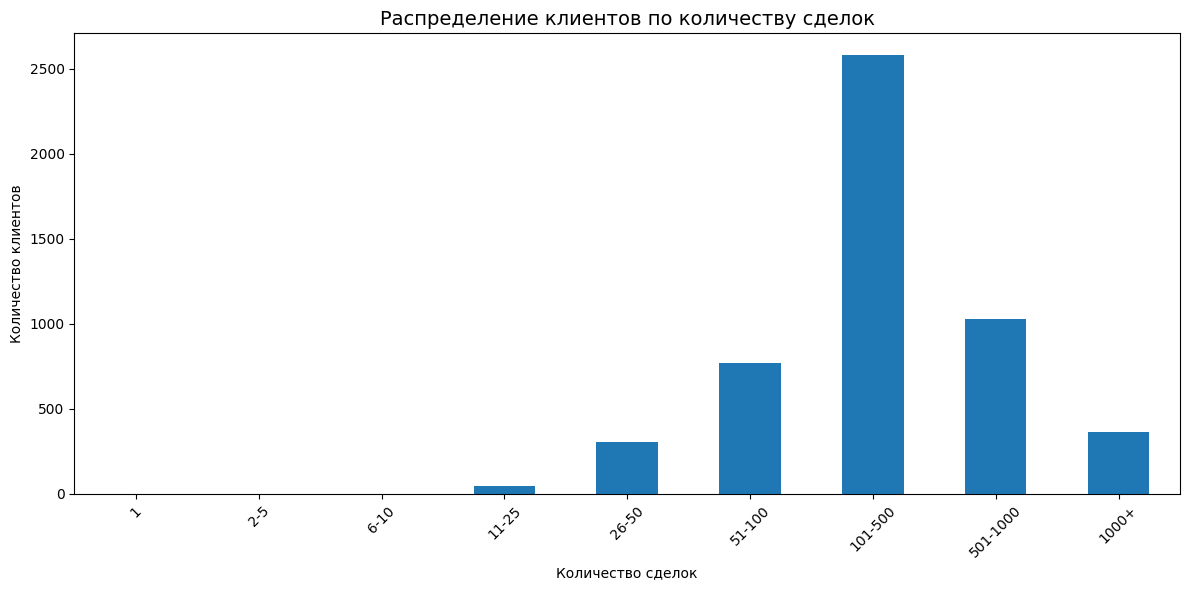

In [26]:
plt.figure(figsize=(12, 6))
trade_distribution.plot(kind='bar')
plt.title('Распределение клиентов по количеству сделок', fontsize=14)
plt.xlabel('Количество сделок')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
portfolio_cols = ['ccr_balance_amt', 'lon_balance_amt', 'cor_balance_amt']
for col in portfolio_cols:
    if col in train.columns:
        train[col] = pd.to_numeric(train[col], errors='coerce').fillna(0)

In [28]:
portfolio_analysis = train.groupby('id').agg({
    "portf_total_amt" : 'sum',
    'date': ['min', 'max']  # Первая и последняя дата
}).reset_index()

portfolio_analysis.columns = ['id', 'portf_total', 'first_date', 'last_date']

# Общий портфель
portfolio_analysis['total_portfolio'] = (
    (portfolio_analysis['portf_total']) 
)

# Анализ дат
portfolio_analysis['first_date'] = pd.to_datetime(portfolio_analysis['first_date'], errors='coerce')
portfolio_analysis['last_date'] = pd.to_datetime(portfolio_analysis['last_date'], errors='coerce')
portfolio_analysis['usage_duration_days'] = (
    portfolio_analysis['last_date'] - portfolio_analysis['first_date']
).dt.days

print("Статистика по портфелю клиентов:")
print(f"Средний размер портфеля: {portfolio_analysis['total_portfolio'].mean():,.0f} руб.")
print(f"Медианный размер портфеля: {portfolio_analysis['total_portfolio'].median():,.0f} руб.")
print(f"Максимальный размер портфеля: {portfolio_analysis['total_portfolio'].max():,.0f} руб.")

# Статистика по длительности использования
print(f"\nСтатистика по длительности использования:")
print(f"Средняя длительность: {portfolio_analysis['usage_duration_days'].mean():.1f} дней")
print(f"Медианная длительность: {portfolio_analysis['usage_duration_days'].median():.1f} дней")
print(f"Максимальная длительность: {portfolio_analysis['usage_duration_days'].max():.0f} дней")

# Корреляция между активностью и размером портфеля
merged_analysis = client_analysis.merge(portfolio_analysis, on='id', how='inner')

print(f"\nКорреляция между количеством сделок и размером портфеля: {merged_analysis['total_trades'].corr(merged_analysis['total_portfolio']):.3f}")


Статистика по портфелю клиентов:
Средний размер портфеля: 5,451,310 руб.
Медианный размер портфеля: 803,857 руб.
Максимальный размер портфеля: 1,264,457,396 руб.

Статистика по длительности использования:
Средняя длительность: 89.0 дней
Медианная длительность: 89.0 дней
Максимальная длительность: 89 дней

Корреляция между количеством сделок и размером портфеля: 0.016


In [29]:
active_profile = merged_analysis[merged_analysis['total_trades'] > 10].copy()

print(f"Профиль активного клиента (клиенты с >10 сделками):")
print(f"Количество клиентов: {len(active_profile)}")
print(f"Среднее количество сделок: {active_profile['total_trades'].mean():.1f}")
print(f"Средний размер портфеля: {active_profile['total_portfolio'].mean():,.0f} руб.")
print(f"Средняя длительность использования: {active_profile['usage_duration_days'].mean():.1f} дней")

# Топ-10 самых активных клиентов
top_active = active_profile.nlargest(10, 'total_trades')[['id', 'total_trades', 'total_portfolio', 'usage_duration_days']]
print(f"\nТоп-10 самых активных клиентов:")
print(top_active.to_string(index=False))

Профиль активного клиента (клиенты с >10 сделками):
Количество клиентов: 5092
Среднее количество сделок: 382.6
Средний размер портфеля: 5,452,220 руб.
Средняя длительность использования: 89.0 дней

Топ-10 самых активных клиентов:
        id  total_trades  total_portfolio  usage_duration_days
1822388874        2569.0       14972433.0                   89
1513271932        2392.0         460647.0                   89
 880796283        2353.0        5716946.0                   89
 442335554        2266.0         397040.0                   89
1035967538        2192.0       15260324.0                   89
1024650615        2191.0        3503229.0                   89
 747144309        2179.0        3782572.0                   89
2117690844        2161.0        2500419.0                   89
  64424577        2144.0        4657777.0                   89
 638265803        2138.0        1083248.0                   89
